<a href="https://colab.research.google.com/github/ruus77/Python/blob/main/S%26P_500_2005_2023_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [261]:
start_date = "2005-01-01"
end_date = "2025-02-01"
ticker = "SPY"


In [262]:
df = yf.download(ticker,
                 start_date, end_date)


/tmp/ipython-input-2056220204.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker,
[*********************100%***********************]  1 of 1 completed


In [263]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2005-01-03,82.074059,83.070135,81.801160,82.933683,55748000
2005-01-04,81.071144,82.237782,80.805069,82.183201,69167600
2005-01-05,80.511681,81.357662,80.504857,81.009716,65667300
2005-01-06,80.921036,81.289448,80.682251,80.805055,47814700
2005-01-07,80.805046,81.344020,80.593547,81.166635,55847700


In [264]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2005-01-03,82.074059,83.070135,81.801160,82.933683,55748000
2005-01-04,81.071144,82.237782,80.805069,82.183201,69167600
2005-01-05,80.511681,81.357662,80.504857,81.009716,65667300
2005-01-06,80.921036,81.289448,80.682251,80.805055,47814700
2005-01-07,80.805046,81.344020,80.593547,81.166635,55847700


## Compute daily returns
Using formula:
$$
 D_r = \frac{P_t}{P_{t-1}} - 1
$$

$P_t$ - Adj Close



In [265]:
df["Daily Return"] = df["Close"] / df["Close"].shift(periods=1) - 1
df.columns = df.columns.get_level_values(0)

In [266]:
df.dropna().head()

Price,Close,High,Low,Open,Volume,Daily Return
Date,,,,,,
2005-01-04,81.071144,82.237782,80.805069,82.183201,69167600,-0.012220
2005-01-05,80.511681,81.357662,80.504857,81.009716,65667300,-0.006901
2005-01-06,80.921036,81.289448,80.682251,80.805055,47814700,0.005084
2005-01-07,80.805046,81.344020,80.593547,81.166635,55847700,-0.001433
2005-01-10,81.187119,81.500950,80.736835,80.736835,56563300,0.004728


<Axes: title={'center': 'Daily Return Distribution of the S&P 500'}, ylabel='Frequency'>

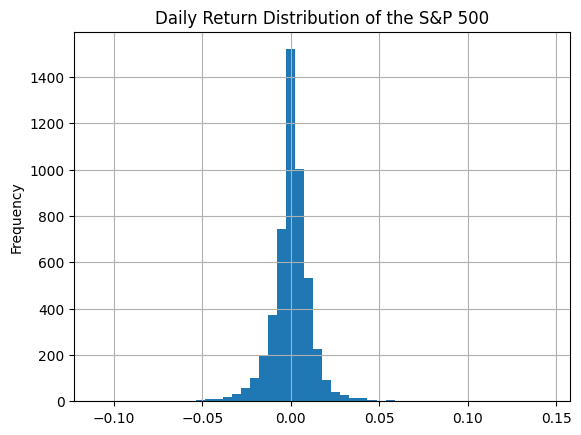

In [267]:
df["Daily Return"].plot(kind="hist", bins=50, title="Daily Return Distribution of the S&P 500", grid=True)


<Axes: title={'center': 'Daily Return of the S&P 500 Boxplot'}>

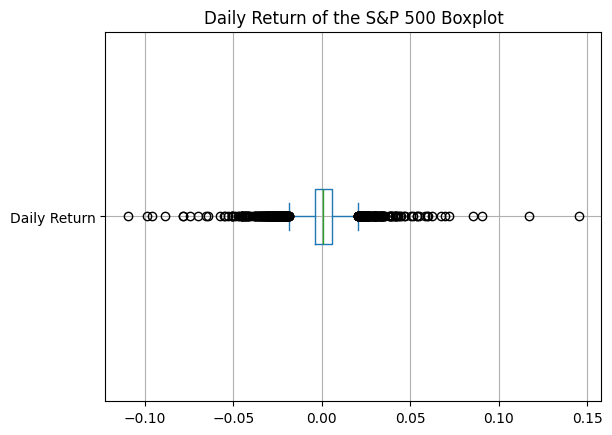

In [268]:
df["Daily Return"].plot(kind="box", title="Daily Return of the S&P 500 Boxplot", vert=False, grid=True)

In [269]:
df['Daily Return'].isna().sum()

np.int64(1)

In [270]:
df = df.dropna()
dr = df['Daily Return']
dr.head()

,Daily Return
Date,
2005-01-04,-0.012220
2005-01-05,-0.006901
2005-01-06,0.005084
2005-01-07,-0.001433
2005-01-10,0.004728


In [271]:
dr.shape

(5052,)

## Compute monthly returns
Using formula:
$$
 M_r = \Pi_{i=1} (1+r_i)  - 1
$$
$r$ - daily return




In [272]:
dr.index = pd.to_datetime(dr.index)
monthly_ret = dr.resample("ME").agg(lambda x: (1+x).prod() - 1)
monthly_ret = monthly_ret.to_frame()


In [273]:
monthly_ret = monthly_ret.rename(columns={"Daily Return" : "Monthly Return"})
monthly_ret.shape

(241, 1)

In [274]:
monthly_ret.head()

,Monthly Return
Date,
2005-01-31,-0.017789
2005-02-28,0.020904
2005-03-31,-0.018292
2005-04-30,-0.018736
2005-05-31,0.032225


In [275]:
monthly_ret.tail()

,Monthly Return
Date,
2024-09-30,0.021005
2024-10-31,-0.008924
2024-11-30,0.059633
2024-12-31,-0.024060
2025-01-31,0.026856


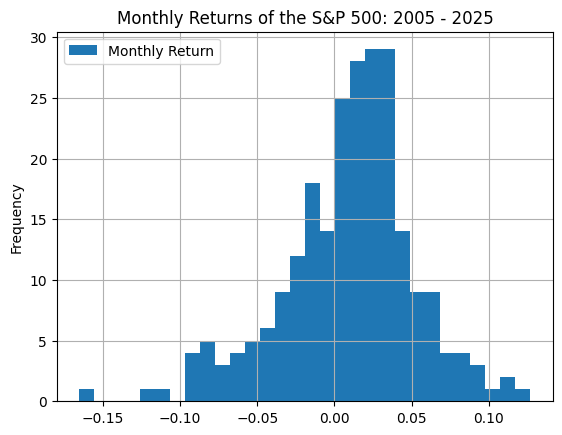

In [276]:
monthly_ret.plot(kind="hist", bins=30, grid=True, title="Monthly Returns of the S&P 500: 2005 - 2025");

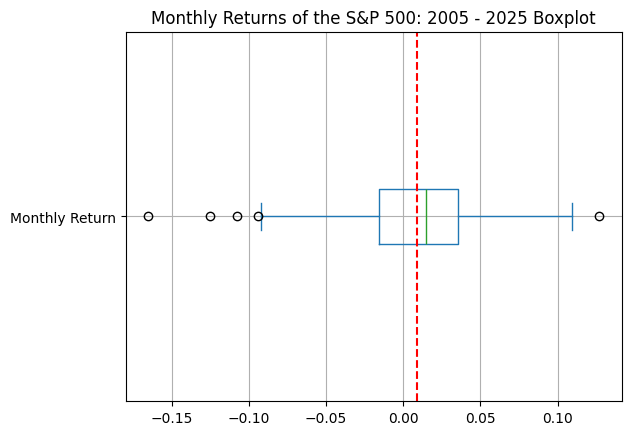

In [277]:
ax = monthly_ret.plot(kind="box", grid=True, title="Monthly Returns of the S&P 500: 2005 - 2025 Boxplot", vert=False);
ax.axvline(monthly_ret.mean().item(), color="red", linestyle="--");


In [278]:
monthly_ret.mean().item()

0.009214735883804477

In [279]:
monthly_ret.quantile([0, .25, .5, 1])

,Monthly Return
0.00,-0.165187
0.25,-0.015706
0.50,0.015041
1.00,0.126984


### Expected return


In [280]:
(1 + monthly_ret.mean().item())**12 - 1

0.11635673816407999

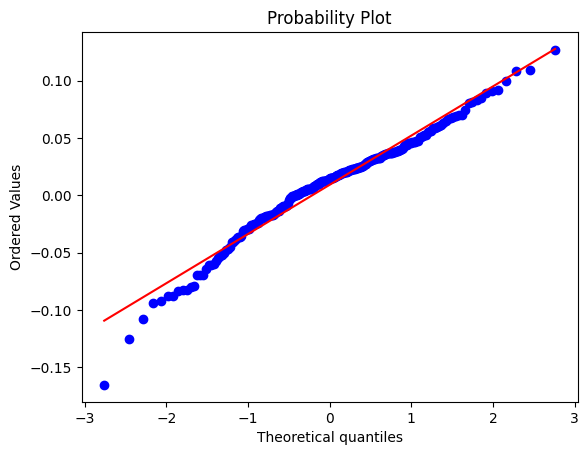

In [281]:
import scipy.stats as stats

stats.probplot(monthly_ret['Monthly Return'], dist="norm", plot=plt);

In [282]:
monthly_ret.quantile([ .25, .5, .74])

,Monthly Return
0.25,-0.015706
0.50,0.015041
0.74,0.034410
